<a href="https://colab.research.google.com/github/RamsRD/desafio-alura-telecom-x-2/blob/main/TelecomX_LATAM_2_de_Rams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafío Telecom X LATAM 2**

#🛠️ Preparación de los datos

##Importación de datos

In [58]:
#Importamos la biblioteca de pandas, numpy, matplotlib y seaborn para manipulación de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importando entropía de Scipy.stats
from scipy.stats import entropy

#Mostrar todas las columnas, sin truncarlas
pd.set_option('display.max_columns', None)

#Mostrar todas las filas, sin truncarlas
pd.set_option('display.max_rows', None)

In [65]:
#URLs del archivo .csv con los datos de Telecom X
url1 = "https://raw.githubusercontent.com/RamsRD/desafio-alura-telecom-x-2/refs/heads/main/datos_transformados.csv"

#Leyendo los archivos .csv y almacenando los datos en un DataFrame
datos_transformados = pd.read_csv(url1)

##Analizando los datos

In [61]:
#Viendo el tamaño de los datos
datos_transformados.shape

(7267, 22)

In [62]:
#Viendo los primeros 6 datos
datos_transformados.head(6)

,Tasa de Abandono (Churn),Género,Adulto Mayor,Tiene Pareja,Tiene Dependientes,Meses de Contrato,Servicio Telefónico,Múltiples Líneas,Tipo de Internet,Seguridad en Línea,Respaldo en Línea,Protección del Equipo,Soporte Técnico,TV Streaming,Películas Streaming,Tipo de Contrato,Facturación en Línea,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario,Cantidad de Servicios
0,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Un año,Sí,Cheque enviado por correo,65.6,593.30,2.19,5
1,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mes a mes,No,Cheque enviado por correo,59.9,542.40,2.00,4
2,Sí,Masculino,No,No,No,4,Sí,No,Fibra Óptica,No,No,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.46,3
3,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra Óptica,No,Sí,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.27,6
4,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra Óptica,No,No,No,Sí,Sí,No,Mes a mes,Sí,Cheque enviado por correo,83.9,267.40,2.80,4
5,No,Femenino,No,No,Sí,9,Sí,No,DSL,No,No,No,Sí,Sí,Sí,Mes a mes,Sí,Tarjeta de crédito (automático),69.4,571.45,2.31,5


In [63]:
#Viendo los metadatos de los datos
datos_transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tasa de Abandono (Churn)  7267 non-null   object 
 1   Género                    7267 non-null   object 
 2   Adulto Mayor              7267 non-null   object 
 3   Tiene Pareja              7267 non-null   object 
 4   Tiene Dependientes        7267 non-null   object 
 5   Meses de Contrato         7267 non-null   int64  
 6   Servicio Telefónico       7267 non-null   object 
 7   Múltiples Líneas          7267 non-null   object 
 8   Tipo de Internet          7267 non-null   object 
 9   Seguridad en Línea        7267 non-null   object 
 10  Respaldo en Línea         7267 non-null   object 
 11  Protección del Equipo     7267 non-null   object 
 12  Soporte Técnico           7267 non-null   object 
 13  TV Streaming              7267 non-null   object 
 14  Película

In [64]:
#Revisar si quedan valores nulos
print("\nValores nulos:")
print(datos_transformados.isnull().sum())


Valores nulos:
Tasa de Abandono (Churn)    0
Género                      0
Adulto Mayor                0
Tiene Pareja                0
Tiene Dependientes          0
Meses de Contrato           0
Servicio Telefónico         0
Múltiples Líneas            0
Tipo de Internet            0
Seguridad en Línea          0
Respaldo en Línea           0
Protección del Equipo       0
Soporte Técnico             0
TV Streaming                0
Películas Streaming         0
Tipo de Contrato            0
Facturación en Línea        0
Método de Pago              0
Cargo Mensual               0
Cargo Total                 0
Cargo Diario                0
Cantidad de Servicios       0
dtype: int64


##Encoding

In [69]:
#Aplicar OneHotEncoding a todas las variables categóricas
datos_codificados = pd.get_dummies(datos_transformados, drop_first=True)

#Verificar las dimensiones del viejo y del nuevo DataFrame
print("Dimensiones originales:", datos_transformados.shape)
print("Dimensiones después del encoding:", datos_codificados.shape)

#Vista previa de los cambios
datos_codificados.head(6)

Dimensiones originales: (7267, 22)
Dimensiones después del encoding: (7267, 33)


,Meses de Contrato,Cargo Mensual,Cargo Total,Cargo Diario,Cantidad de Servicios,Tasa de Abandono (Churn)_Sí,Género_Masculino,Adulto Mayor_Sí,Tiene Pareja_Sí,Tiene Dependientes_Sí,Servicio Telefónico_Sí,Múltiples Líneas_Sin servicio telefónico,Múltiples Líneas_Sí,Tipo de Internet_Fibra Óptica,Tipo de Internet_Sin Servicio,Seguridad en Línea_Sin servicio de internet,Seguridad en Línea_Sí,Respaldo en Línea_Sin servicio de internet,Respaldo en Línea_Sí,Protección del Equipo_Sin servicio de internet,Protección del Equipo_Sí,Soporte Técnico_Sin servicio de internet,Soporte Técnico_Sí,TV Streaming_Sin servicio de internet,TV Streaming_Sí,Películas Streaming_Sin servicio de internet,Películas Streaming_Sí,Tipo de Contrato_Mes a mes,Tipo de Contrato_Un año,Facturación en Línea_Sí,Método de Pago_Cheque enviado por correo,Método de Pago_Tarjeta de crédito (automático),Método de Pago_Transferencia bancaria (automático)
0,9,65.6,593.30,2.19,5,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,True,False,False
1,9,59.9,542.40,2.00,4,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False
2,4,73.9,280.85,2.46,3,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False
3,13,98.0,1237.85,3.27,6,True,True,True,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,False,False,False
4,3,83.9,267.40,2.80,4,True,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,True,False,False
5,9,69.4,571.45,2.31,5,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,False,True,False,True,False


In [185]:
#Viendo los metadatos de los datos
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 33 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Meses de Contrato                                   7267 non-null   int64  
 1   Cargo Mensual                                       7267 non-null   float64
 2   Cargo Total                                         7267 non-null   float64
 3   Cargo Diario                                        7267 non-null   float64
 4   Cantidad de Servicios                               7267 non-null   int64  
 5   Tasa de Abandono (Churn)_Sí                         7267 non-null   bool   
 6   Género_Masculino                                    7267 non-null   bool   
 7   Adulto Mayor_Sí                                     7267 non-null   bool   
 8   Tiene Pareja_Sí                                     7267 non-null   bool   
 9

##Ajustando nombres

In [186]:
# Diccionario de renombrado
rename_dict = {
    'Meses de Contrato':'Meses_Contrato',
    'Cargo Mensual':'Cargo_Mensual',
    'Cargo Total':'Cargo_Total',
    'Cargo Diario':'Cargo_Diario',
    'Cantidad de Servicios':'Cant_Servicios',
    'Tasa de Abandono (Churn)_Sí':'Churn',
    'Género_Masculino':'Masculino',
    'Adulto Mayor_Sí':'Adulto_Mayor',
    'Tiene Pareja_Sí':'Pareja',
    'Tiene Dependientes_Sí':'Dependientes',
    'Servicio Telefónico_Sí':'Servicio_Telefónico',
    'Múltiples Líneas_Sin servicio telefónico':'MultiLine_SinServicio',
    'Múltiples Líneas_Sí':'MultiLine',
    'Tipo de Internet_Fibra Óptica':'Internet_Fibra',
    'Tipo de Internet_Sin Servicio':'Internet_SinServicio',
    'Seguridad en Línea_Sin servicio de internet':'Seguridad_SinServicio',
    'Seguridad en Línea_Sí':'Seguridad',
    'Respaldo en Línea_Sin servicio de internet':'Respaldo_SinServicio',
    'Respaldo en Línea_Sí':'Respaldo',
    'Protección del Equipo_Sin servicio de internet':'Proteccion_SinServicio',
    'Protección del Equipo_Sí':'Proteccion',
    'Soporte Técnico_Sin servicio de internet':'Soporte_SinServicio',
    'Soporte Técnico_Sí':'Soporte',
    'TV Streaming_Sin servicio de internet':'TV_SinServicio',
    'TV Streaming_Sí':'TV',
    'Películas Streaming_Sin servicio de internet':'Peliculas_SinServicio',
    'Películas Streaming_Sí':'Peliculas',
    'Tipo de Contrato_Mes a mes':'Contrato_MesAMes',
    'Tipo de Contrato_Un año':'Contrato_UnAño',
    'Facturación en Línea_Sí':'Facturacion_Online',
    'Método de Pago_Cheque enviado por correo':'Pago_Cheque',
    'Método de Pago_Tarjeta de crédito (automático)':'Pago_Tarjeta',
    'Método de Pago_Transferencia bancaria (automático)':'Pago_Transferencia'
}

# Aplicar renombrado
datos_codificados.rename(columns=rename_dict, inplace=True)

# Verificar cambios
print(datos_codificados.columns)


Index(['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario',
       'Cant_Servicios', 'Churn', 'Masculino', 'Adulto_Mayor', 'Pareja',
       'Dependientes', 'Servicio_Telefónico', 'MultiLine_SinServicio',
       'MultiLine', 'Internet_Fibra', 'Internet_SinServicio',
       'Seguridad_SinServicio', 'Seguridad', 'Respaldo_SinServicio',
       'Respaldo', 'Proteccion_SinServicio', 'Proteccion',
       'Soporte_SinServicio', 'Soporte', 'TV_SinServicio', 'TV',
       'Peliculas_SinServicio', 'Peliculas', 'Contrato_MesAMes',
       'Contrato_UnAño', 'Facturacion_Online', 'Pago_Cheque', 'Pago_Tarjeta',
       'Pago_Transferencia'],
      dtype='object')


##Verificación de la proporción de cancelación (churn)

In [188]:
#Contar valores en la columna 'Tasa de Abandono (Churn)'
conteo_churn = datos_codificados['Churn'].value_counts()

#Calcular proporción
proporcion_churn = datos_codificados['Churn'].value_counts(normalize=True) * 100

#Resultados
print('Cantidad de clientes por clase:')
print(conteo_churn)
print('\nProporción (%) de clientes por clase:')
print(proporcion_churn)

Cantidad de clientes por clase:
Churn
False    5398
True     1869
Name: count, dtype: int64

Proporción (%) de clientes por clase:
Churn
False    74.280996
True     25.719004
Name: proportion, dtype: float64


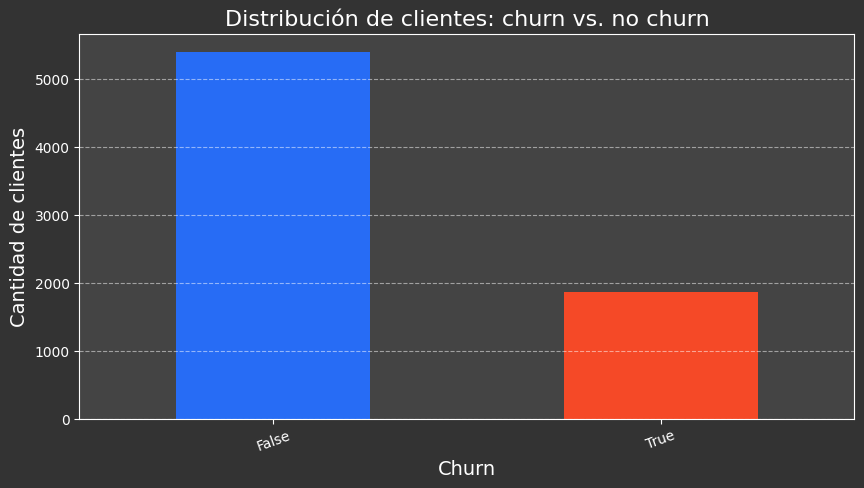

In [189]:
#Visualización rápida con un gráfico
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
conteo_churn.plot(kind='bar', color=['#276CF5', '#F54927'])

#Título del gráfico
plt.title('Distribución de clientes: churn vs. no churn', fontsize=16, color='white')

#Especificando los labels
plt.xlabel('Churn', fontsize=14, color = 'white')
plt.ylabel('Cantidad de clientes', fontsize=14, color = 'white')

#Ajustando labels
plt.xticks(rotation=20, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Fondo del gráfico y de las figuras
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gráfico
plt.show()

##Balanceo de clases

In [190]:
#Importando librerías necesarias
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Variables X (predictoras) y Y (target)
#Asegúrate que en 'y' está la columna de Churn y en X el resto de las columnas
X = datos_codificados.drop(columns=['Churn'])
y = datos_codificados['Churn']

print("Distribución original:", Counter(y))

Distribución original: Counter({False: 5398, True: 1869})


###Oversampling

In [191]:
#Oversampling
versampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)

#sampling_strategy=0.5 => la clase minoritaria será 50% del tamaño de la mayoritaria
X_over, y_over = oversampler.fit_resample(X, y)
print("Distribución tras oversampling:", Counter(y_over))

Distribución tras oversampling: Counter({False: 5398, True: 2699})


###Undersampling

In [192]:
#Undersampling
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

#sampling_strategy=0.5 => la clase minoritaria será el doble que la mayoritaria
X_under, y_under = undersampler.fit_resample(X, y)
print("Distribución tras undersampling:", Counter(y_under))

Distribución tras undersampling: Counter({False: 3738, True: 1869})


##Normalización y estandarización

###Normalización

In [114]:
#Importando bibliotecas
from sklearn.preprocessing import StandardScaler

#Crear scaler
scaler = StandardScaler()

#Ajustar y transformar solo los datos de entrenamiento
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
    X_over, y_over, test_size=0.3, random_state=42, stratify=y_over
)

X_train_std = scaler.fit_transform(X_train_std)
X_test_std = scaler.transform(X_test_std)

###Estandarización

In [153]:
from sklearn.preprocessing import MinMaxScaler

#Crear scaler
minmax_scaler = MinMaxScaler()

#Ajustar y transformar
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_over, y_over, test_size=0.3, random_state=42, stratify=y_over
)

X_train_norm = minmax_scaler.fit_transform(X_train_norm)
X_test_norm = minmax_scaler.transform(X_test_norm)

#🎯 Correlación y selección de variables

In [195]:
#Selección de variables numéricas
numericas = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cant_Servicios', 'Churn']

df_num = datos_codificados[numericas]

##Análisis de correlación

###Matríz de correlación

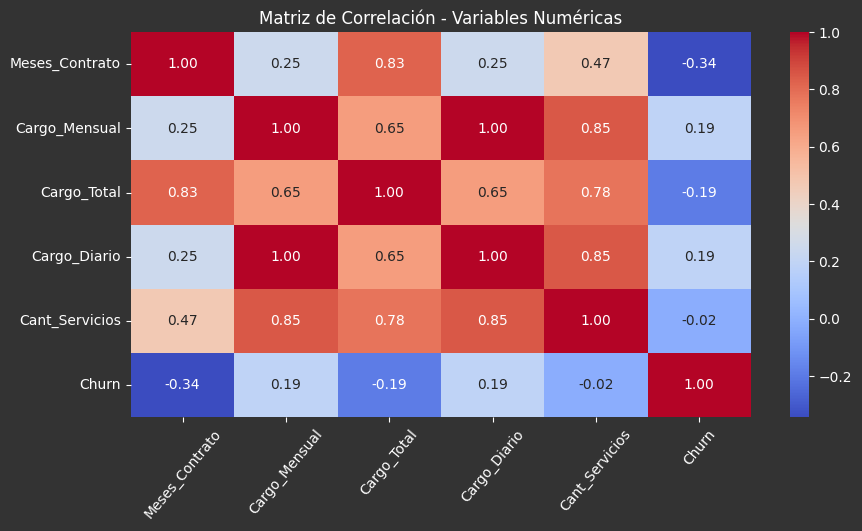

In [196]:
#Calcular matriz de correlación
corr_matrix = df_num.corr()

#Usar estilo dark
plt.style.use('dark_background')

#Visualización
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

#Títutlo del gráfico
plt.title("Matriz de Correlación - Variables Numéricas")

#Ajustar ticks y fondo
plt.xticks(color='white', rotation = 50)
plt.yticks(color='white')
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar gráfico
plt.show()

##Análisis dirigido

###Boxplot: tiempo de contrato vs. cancelación

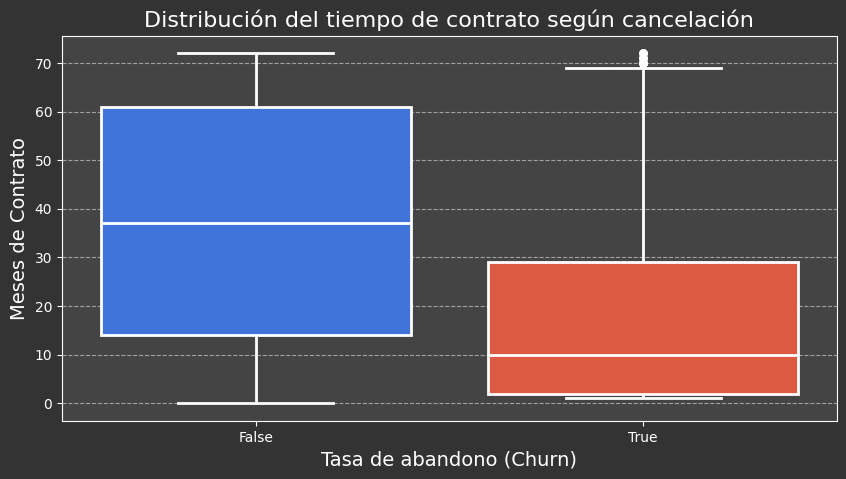

In [197]:
#Usamos el estilo dark para todos los gráficos
plt.style.use('dark_background')

#Crear figura
plt.figure(figsize=(10,5))

#Boxplot de Meses de Contrato por Tasa de Abandono (Churn)
sns.boxplot(x='Churn', y='Meses_Contrato', data=datos_codificados,
            palette=['#276CF5', '#F54927'],
            hue = 'Churn',
            legend = False,
            linewidth=2,  #Grosor de las líneas
            boxprops=dict(edgecolor='white'),  #Borde blanco en cajas
            whiskerprops=dict(color='white'),  #Bigotes blancos
            capprops=dict(color='white'),  #Extremos de bigotes blancos
            medianprops=dict(color='white'),  #Mediana blanca
            flierprops=dict(marker='o', markerfacecolor='white', markersize=5,
                            linestyle='none', markeredgecolor='white')  #Outliers blancos
           )

#Título del gráfico
plt.title('Distribución del tiempo de contrato según cancelación', fontsize=16, color='white')

#Labels de los ejes
plt.xlabel('Tasa de abandono (Churn)', fontsize=14, color='white')
plt.ylabel('Meses de Contrato', fontsize=14, color='white')

#Ajuste de los ticks
plt.xticks(rotation=0, color='white')
plt.yticks(color='white')

#Ajuste de cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Fondo de la figura y del gráfico
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar gráfico
plt.show()

###Boxplot: cargo total vs. cancelación

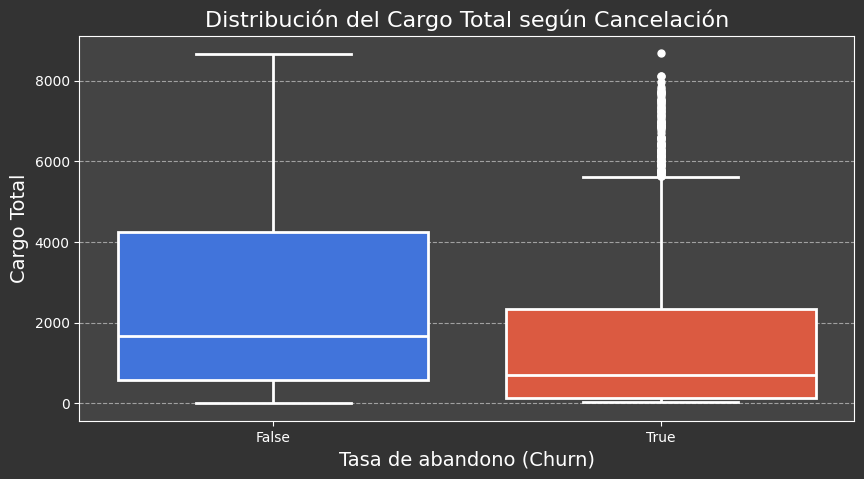

In [198]:
#Creando la figura
plt.figure(figsize=(10,5))

#Boxplot de Cargo Total por Churn
sns.boxplot(x='Churn', y='Cargo_Total', data=datos_codificados,
            palette=['#276CF5', '#F54927'],
            hue = 'Churn',
            legend = False,
            linewidth=2,  #Grosor de las líneas
            boxprops=dict(edgecolor='white'),  #Borde blanco en cajas
            whiskerprops=dict(color='white'),  #Bigotes blancos
            capprops=dict(color='white'),  #Extremos de bigotes blancos
            medianprops=dict(color='white'),  #Mediana blanca
            flierprops=dict(marker='o', markerfacecolor='white', markersize=5,
                            linestyle='none', markeredgecolor='white')  #Outliers blancos
           )

#Título
plt.title('Distribución del Cargo Total según Cancelación', fontsize=16, color='white')

#Labels
plt.xlabel('Tasa de abandono (Churn)', fontsize=14, color='white')
plt.ylabel('Cargo Total', fontsize=14, color='white')

#Ajuste de ticks
plt.xticks(rotation=0, color='white')
plt.yticks(color='white')

#Cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Fondo
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar gráfico
plt.show()

###Scatter plot: meses de contrato por el cargo total, coloreado por churn

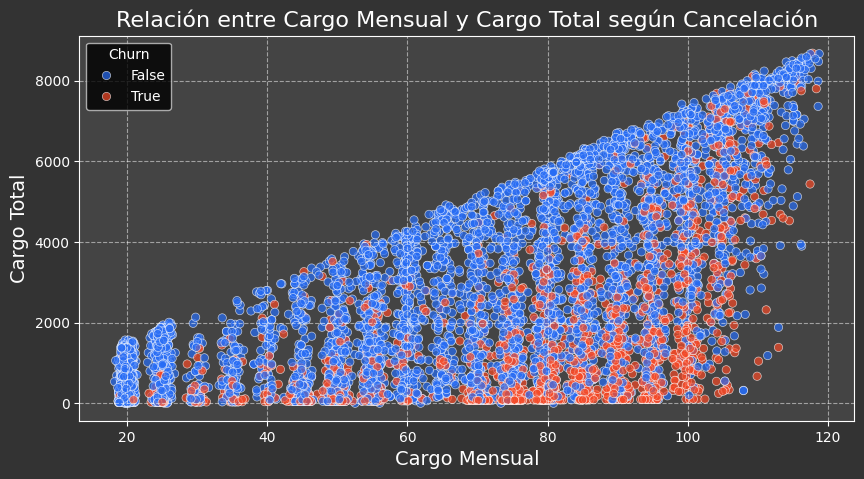

In [202]:
#Creando la figura
plt.figure(figsize=(10,5))

#Scatter plot diferenciando churn
sns.scatterplot(x='Cargo_Mensual', y='Cargo_Total', hue='Churn',
                data=datos_codificados, palette=['#276CF5', '#F54927'], alpha=0.7)

#Título
plt.title('Relación entre Cargo Mensual y Cargo Total según Cancelación', fontsize=16, color='white')

#Labels
plt.xlabel('Cargo Mensual', fontsize=14, color='white')
plt.ylabel('Cargo Total', fontsize=14, color='white')

#Ajuste de ticks
plt.xticks(color='white')
plt.yticks(color='white')

#Cuadriculado
plt.grid(linestyle='--', alpha=0.5)

#Fondo
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar gráfico
plt.show()

#🤖 Modelado predictivo

##Separación de datos

###RandomForest

In [203]:
#Importando biblioteca para hacer las pruebas
from sklearn.model_selection import train_test_split

#División de datos
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_over, y_over,
    test_size=0.3,       #30% para prueba
    random_state=42,     #Reproducibilidad
    stratify=y_over      #Mantener proporción de clases
)

#Verificar tamaños
print("Tamaño conjunto entrenamiento RF:", X_train_rf.shape)
print("Tamaño conjunto prueba RF:", X_test_rf.shape)

Tamaño conjunto entrenamiento RF: (5667, 32)
Tamaño conjunto prueba RF: (2430, 32)


###Para modelos sensibles a escala (logistic regression/KNN)


In [204]:
#Importando biblioteca
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#División
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_over, y_over,
    test_size=0.3,
    random_state=42,
    stratify=y_over
)

#2a. Estandarización
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_s)
X_test_std = scaler.transform(X_test_s)

#2b. Normalización
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train_s)
X_test_norm = minmax_scaler.transform(X_test_s)

##Justificación de la normalización

Los modelos como Regresión Logística o KNN calculan distancias o coeficientes en función de los valores de las variables. Si algunas variables tienen rangos mucho mayores (por ejemplo, Cargo Total vs Meses de Contrato), estas dominan el cálculo y sesgan los resultados.

Aplicar normalización (Min-Max) o estandarización (Z-score) asegura que todas las variables contribuyan de manera proporcional, mejorando la precisión del modelo.

Por otro lado, Random Forest hace divisiones basadas en umbrales de las variables, y la escala no afecta el criterio de separación, por lo que podemos usar los datos tal cual.

##Creación de modelos

###RandomForest (sin escalado)

In [205]:
#Importando bibliotecas
from sklearn.ensemble import RandomForestClassifier

# Separación de datos
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_over, y_over, test_size=0.3, random_state=42, stratify=y_over
)

#Entrenamiento
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

#Predicciones
y_pred_rf = rf_model.predict(X_test_rf)
y_prob_rf = rf_model.predict_proba(X_test_rf)[:,1]

#Evaluación
print("=== Random Forest ===")
print(classification_report(y_test_rf, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test_rf, y_prob_rf))

=== Random Forest ===
              precision    recall  f1-score   support

       False       0.86      0.87      0.86      1620
        True       0.73      0.71      0.72       810

    accuracy                           0.82      2430
   macro avg       0.80      0.79      0.79      2430
weighted avg       0.82      0.82      0.82      2430

ROC AUC: 0.8801527968297517


###Regresión logística con estandarización

In [206]:
#Importando bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

#Separación de datos
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_over, y_over, test_size=0.3, random_state=42, stratify=y_over
)

#Estandarización
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

#Entrenamiento
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_lr, y_train_lr)

#Predicciones
y_pred_lr = lr_model.predict(X_test_lr)
y_prob_lr = lr_model.predict_proba(X_test_lr)[:,1]

#Evaluación
print("=== Regresión Logística ===")
print(classification_report(y_test_lr, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test_lr, y_prob_lr))

=== Regresión Logística ===
              precision    recall  f1-score   support

       False       0.83      0.83      0.83      1620
        True       0.67      0.66      0.66       810

    accuracy                           0.78      2430
   macro avg       0.75      0.75      0.75      2430
weighted avg       0.78      0.78      0.78      2430

ROC AUC: 0.8510238530711783


##Evaluación de los modelos

###Evaluación de RandomForest

In [207]:
#Bibliotecas necesarias
from sklearn.metrics import confusion_matrix, accuracy_score

#Título
print("=== Random Forest ===\n")

# Reporte de métricas
print(classification_report(y_test_rf, y_pred_rf))

# Exactitud
acc_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Exactitud (Accuracy):", acc_rf)

# ROC AUC
roc_rf = roc_auc_score(y_test_rf, y_prob_rf)
print("ROC AUC:", roc_rf)

# Matriz de confusión
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

=== Random Forest ===

              precision    recall  f1-score   support

       False       0.86      0.87      0.86      1620
        True       0.73      0.71      0.72       810

    accuracy                           0.82      2430
   macro avg       0.80      0.79      0.79      2430
weighted avg       0.82      0.82      0.82      2430

Exactitud (Accuracy): 0.817283950617284
ROC AUC: 0.8801527968297517


###Gráfico matríz de confusión

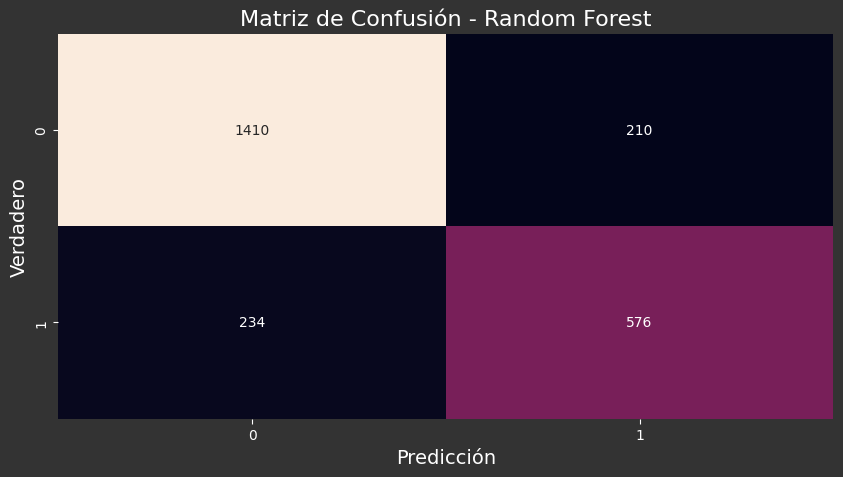

In [213]:
#Crear gráfico
plt.figure(figsize=(10,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cbar=False)


#Título
plt.title("Matriz de Confusión - Random Forest", fontsize=16, color='white')

#Ajustando labels y sus ticks
plt.xlabel("Predicción", fontsize=14, color='white')
plt.ylabel("Verdadero", fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

#Colores de fondo y gráfico
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar
plt.show()

###Evaluación de Regresión Logística

In [164]:
#Título
print("\n=== Regresión Logística ===\n")

#Reporte de métricas
print(classification_report(y_test_lr, y_pred_lr))

#Exactitud
acc_lr = accuracy_score(y_test_lr, y_pred_lr)
print("Exactitud (Accuracy):", acc_lr)

#ROC AUC
roc_lr = roc_auc_score(y_test_lr, y_prob_lr)
print("ROC AUC:", roc_lr)

#Matriz de confusión
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)


=== Regresión Logística ===

              precision    recall  f1-score   support

       False       0.83      0.83      0.83      1620
        True       0.67      0.66      0.66       810

    accuracy                           0.78      2430
   macro avg       0.75      0.75      0.75      2430
weighted avg       0.78      0.78      0.78      2430

Exactitud (Accuracy): 0.7765432098765432
ROC AUC: 0.8510238530711783


###Gráfico de matríz de confusión: regresión logística

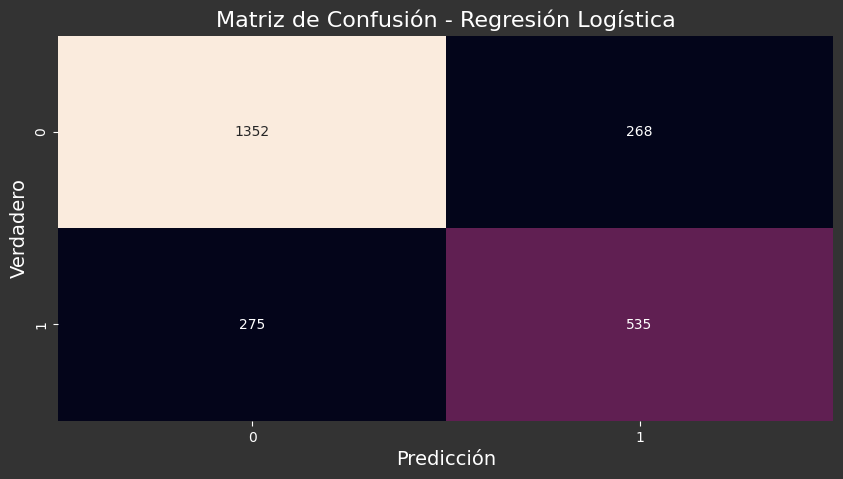

In [214]:
#Gráfico matriz de confusión
plt.figure(figsize=(10,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cbar=False)

#Título del gráfico
plt.title("Matriz de Confusión - Regresión Logística", fontsize=16, color='white')

#Ajustando labels y ticks
plt.xlabel("Predicción", fontsize=14, color='white')
plt.ylabel("Verdadero", fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

#Ajustando fondo y color del gráfico
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar gráfico
plt.show()

##Análisis comparativo

In [215]:
#Análisis comparativo entre ambos modelos de machine learning
print("\n=== Análisis comparativo ===\n")
print(f"Random Forest Accuracy: {acc_rf:.2f}, ROC AUC: {roc_rf:.3f}")
print(f"Regresión Logística Accuracy: {acc_lr:.2f}, ROC AUC: {roc_lr:.3f}\n")


=== Análisis comparativo ===

Random Forest Accuracy: 0.82, ROC AUC: 0.880
Regresión Logística Accuracy: 0.78, ROC AUC: 0.851



##Observaciones rápidas, mientras comparamos ambos modelos

- RandomForest obtuvo mejor desempeño en todas las métricas comparadas con Regresión Logística.

- RandomForest tiene mayor capacidad de identificar correctamente clientes que cancelan (recall más alto).

- Regresión logística muestra menor precisión y recall para la clase 'True' (churn).

- No se observa overfitting evidente en Random Forest, pero es posible ajustar parámetros si se quiere mejorar precisión para la clase minoritaria.

- Regresión logística podría mejorar con técnicas de selección de variables o regularización.

#📋 Interpretación y conclusiones

##Análisis de la importancia de las variables

###RandomForest - importancia de sus variables

###Regresión logística - coeficientes

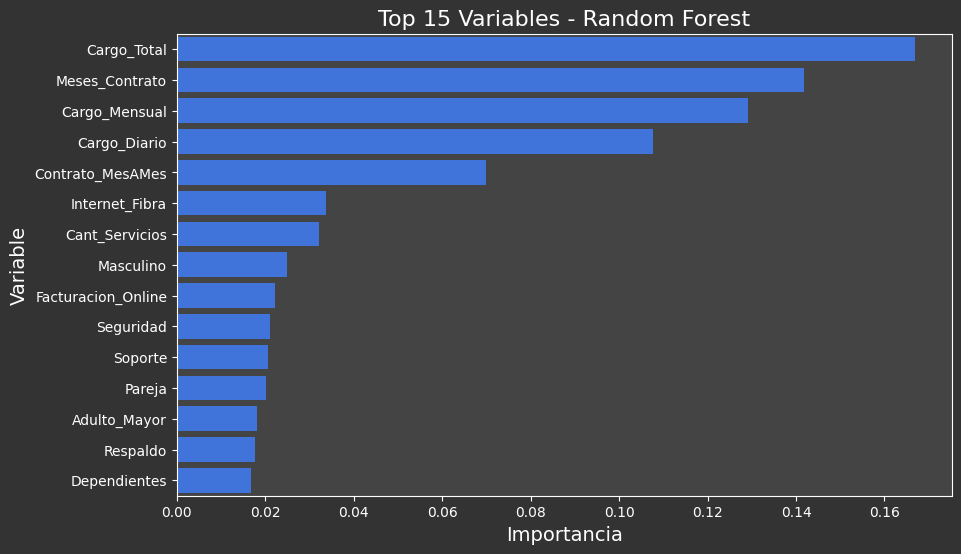

In [216]:
#Importancia de variables
importances = rf_model.feature_importances_

#Crear DataFrame
df_rf = pd.DataFrame({'Variable': X_over.columns, 'Importancia': importances})
df_rf = df_rf.sort_values(by='Importancia', ascending=False).head(15)  #Top 15

#Visualización
plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=df_rf, palette=['#276CF5']*len(df_rf), hue = 'Importancia', legend = False)

#Título
plt.title("Top 15 Variables - Random Forest", fontsize=16, color='white')

#Labels y ticks
plt.xlabel("Importancia", fontsize=14, color='white')
plt.ylabel("Variable", fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

#Fondo del gráfico y sus colores
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar gráfico
plt.show()

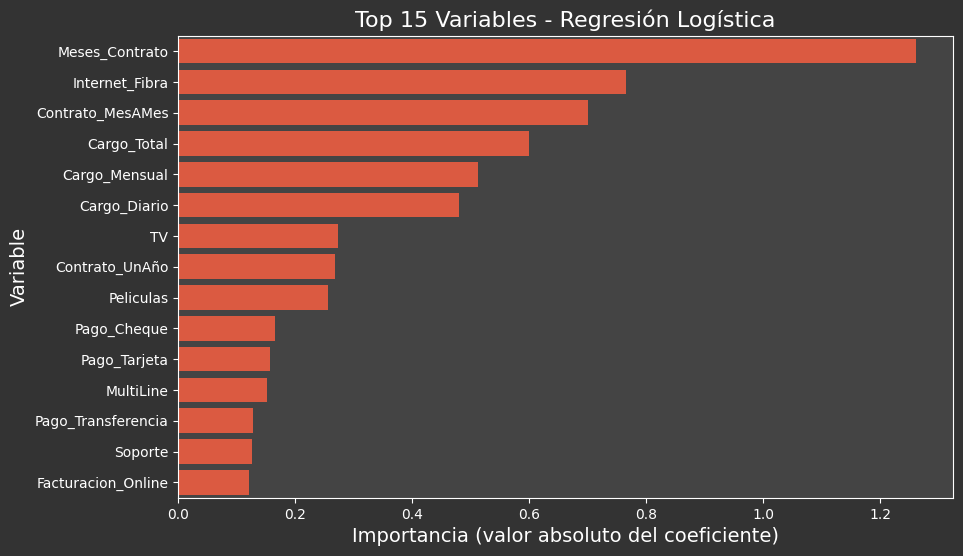

In [217]:
#Obtener los nombres de las columnas
feature_names = X_over.columns

#Coeficientes del modelo
coef_lr = lr_model.coef_[0]

#Crear DataFrame para visualización
df_coef = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coef_lr})
df_coef['Importancia'] = np.abs(df_coef['Coeficiente'])  #Importancia como valor absoluto

#Ordenar por importancia
df_coef = df_coef.sort_values(by='Importancia', ascending=False).head(15)  #Top 15

#Visualización
plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=df_coef, palette=['#F54927']*len(df_coef), hue = 'Importancia', legend = False)

#Título
plt.title("Top 15 Variables - Regresión Logística", fontsize=16, color='white')

#Ajustando labels y ticks
plt.xlabel("Importancia (valor absoluto del coeficiente)", fontsize=14, color='white')
plt.ylabel("Variable", fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

#Fondo del gráfico y sus colores
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar gráfico
plt.show()

##Conclusión del Análisis de Churn – Telecom X

###**Introducción**

El presente análisis tuvo como objetivo identificar patrones y factores asociados a la cancelación de clientes (churn) en Telecom X.

La tasa de abandono representa un impacto significativo en los ingresos de la empresa, aumentando los costos de adquisición de nuevos clientes y reduciendo la fidelidad. Este estudio busca determinar qué variables influyen más en la probabilidad de cancelación, con el fin de diseñar estrategias de retención efectivas.

###**Desarrollo**

**Limpieza y tratamiento de datos:**

* Se importaron y revisaron los datos, verificando la ausencia de valores nulos o duplicados.

* Se transformaron columnas a los tipos adecuados (numéricos, categóricos y booleanos).

* Se crearon variables derivadas relevantes, como `Churn`, `Meses_Contrato` y `Cant_Servicios`.

* Se renombraron columnas para mejorar la legibilidad y consistencia en los análisis y gráficos.

* Se aplicaron técnicas de balanceo de clases (oversampling y undersampling) para manejar la desproporción entre clientes que abandonan y los que permanecen.

###**Análisis exploratorio de datos (EDA)**

**Hallazgos principales:**

* **Distribución por Churn y Género:** La proporción de abandono es similar entre hombres y mujeres; el género no parece ser un factor determinante.

* **Tipo de Contrato:** Los clientes con contratos mensuales presentan mayor propensión al abandono que aquellos con contratos a largo plazo.

* **Método de Pago:** Los pagos mes a mes o con tarjetas no automatizadas se asocian con tasas más altas de churn.

* **Edad:** Los adultos mayores muestran una ligera tendencia mayor al abandono, posiblemente relacionada con satisfacción o adaptación al servicio.

* **Tiempo de permanencia:** Los clientes con menor tiempo de contrato (`Meses_Contrato`) abandonan con mayor frecuencia.

* **Cargos:** Clientes con `Cargo_Total` elevado presentan mayores tasas de cancelación.

* **Cantidad de servicios:** Los clientes con múltiples servicios muestran mayor probabilidad de churn relativo, mientras que quienes tienen pocos servicios tienden a permanecer.

**Visualizaciones clave:**

* Boxplots de `Meses_Contrato` y `Cargo_Total` frente a `Churn` evidencian patrones claros de abandono entre clientes con menor permanencia y cargos más altos.

* La matriz de correlación muestra alta correlación entre `Meses_Contrato` y `Cargo_Total` (0.83), y entre `Cargo_Mensual` y `Cargo_Diario` (1.00), indicando relaciones significativas entre las variables de gasto y duración de contrato.

* Gráficos de barras y scatter plots confirman que contratos mensuales, altos cargos y mayor número de servicios son factores que aumentan el riesgo de churn.

###**Evaluación de modelos predictivos**

* **Random Forest:** Mostró mejor desempeño general, con un accuracy de 82% y ROC AUC de 0.88, capturando bien los patrones de abandono.

* **Regresión Logística:** Accuracy de 78% y ROC AUC de 0.85, menos eficaz que Random Forest en la predicción de clientes que abandonan.

* **Importancia de variables:** Tanto Random Forest como Regresión Logística destacan `Meses_Contrato`, `Cargo_Total`, tipo de contrato y método de pago como factores críticos.

###**Conclusiones e insights**

1. **Tipo de contrato:** Los contratos mensuales concentran la mayoría de la evasión; incentivar contratos a largo plazo es clave.

2. **Método de pago:** Los pagos automáticos favorecen la retención; los métodos mes a mes o no automatizados aumentan el riesgo de churn.

3. **Tiempo de permanencia:** Clientes recientes son más propensos a cancelar; el monitoreo temprano y programas de fidelización son esenciales.

4. **Cargos elevados:** Clientes con `Cargo_Total` alto tienen mayor propensión a abandonar; revisar políticas de precios y promociones puede reducir churn.

5. **Cantidad de servicios:** Clientes con múltiples servicios requieren atención personalizada para prevenir cancelaciones.

6. **Género y edad:** El género no representa un factor determinante; los adultos mayores requieren adaptaciones específicas para mejorar su experiencia.

###**Recomendaciones estratégicas**

* Incentivar contratos a largo plazo mediante descuentos o beneficios adicionales.

* Promover métodos de pago automáticos y simplificar los procesos de facturación.

* Implementar programas de fidelización dirigidos a clientes nuevos durante los primeros meses de contrato.

* Revisar políticas de precios, especialmente para clientes con cargos totales altos, y ofrecer planes más competitivos.

* Adaptar el servicio a las necesidades de adultos mayores mediante soporte personalizado y guías de uso simplificadas.

* Monitorear clientes con múltiples servicios y ofrecer paquetes optimizados o acompañamiento especializado para mejorar la retención.